In [0]:
import keras
keras.__version__ 

'2.2.5'

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

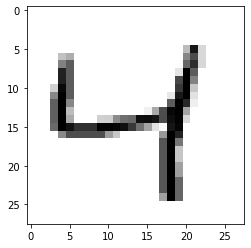

In [0]:
digit = train_images[2]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

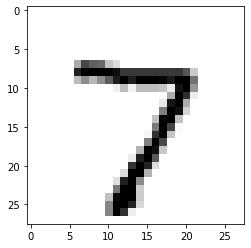

In [0]:
digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
test_labels.shape

(10000, 10)

In [0]:
network.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/1
60000/60000 [==============================] - 5s 78us/step - loss: 0.0174 - acc: 0.9948


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

#Acc 1)512 relu 2)10 softmax  Train:60000, Test:10000, epoki: 5, batch size=128 0,90
#Acc 1)512 relu 2)10 softmax  Train:60000, Test:10000, epoki: 20, batch size=128 0.9818 
#Acc 1)512 relu 2)10 softmax  Train:60000, Test:10000, epoki: 40, batch size=128 0.9841
#Acc 1)512 relu 2)10 softmax  Train:60000, Test:10000, epoki: 100, batch size=128 0.9839


10000/10000 [==============================] - 1s 61us/step
test_acc: 0.9828


In [0]:
result = network.predict(test_images)
import numpy as np
np.argmax(result[0])

7

In [0]:
result[0]

array([6.38145892e-08, 3.06619796e-09, 1.31562765e-05, 2.54446128e-03,
       2.83903413e-12, 2.38632055e-07, 3.40494031e-14, 9.97378469e-01,
       1.00711327e-06, 6.26143083e-05], dtype=float32)